In [1]:
## FINDINNG DONORS FOR CHARITY ML

In [2]:
# Import libraries 
import numpy as np
import pandas as pd
from time import time
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
## Loading the Census dataset
data = pd.read_csv("/Users/sumedha/Desktop/census.csv")

# Displaying the dataset
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
## Data Exploration

n_records = len(data.index)
print(type(data.income))

<class 'pandas.core.series.Series'>


In [5]:
# Number of records where individual's income is more than $50,000
n_greater_50k = data[data.income=='>50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = data[data.income=='<=50K'].shape[0] 

# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/n_records)*100

print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


In [6]:
print(type(data.education_level))

<class 'pandas.core.series.Series'>


In [7]:
## Pre-processing the data
# Seperating feature to be predicted from entire dataset
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

In [12]:
#Encoding the 'income_raw' data to numerical values
income = income_raw.fillna(0.0)
income = income_raw.map({'<=50K':0,'>50K':1})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120d9fe90>,
      dtype=object)

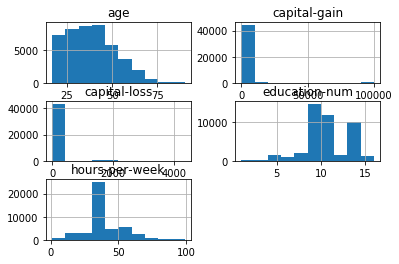

In [8]:
# Visualizing skewed features
data.hist()

In [9]:
## From Histograms we can see that capital gain and capital loss are skewed features
# Transforming Skewed Continuous features
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120c66fd0>,
      dtype=object)

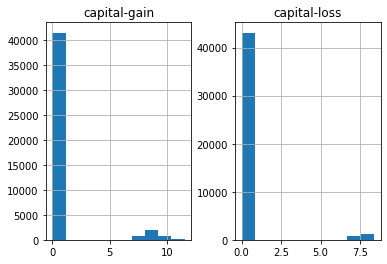

In [10]:
# Visualizing the new log distributions
features_log_transformed[skewed].hist()

In [11]:
## Normalizing Numerical Features using Min-Max Scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])
features_log_minmax_transform.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [13]:
#One-hot encoding the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)
features_final = features_final.fillna(0.0)
features_final

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.219178,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,0.301370,0.800000,0.000000,0.0,0.357143,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45219,0.287671,0.800000,0.000000,0.0,0.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45220,0.369863,0.800000,0.747375,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# Dividing data between training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size = 0.2)


In [31]:

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fitting the learner to the training data 
    start = time() 
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() 
    
    # Calculating the training time
    results['train_time'] = end - start
        
    # Getting the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() 
    
    # Calculating the total prediction time
    results['pred_time'] = end - start
    
    from sklearn.metrics import accuracy_score, fbeta_score        
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    results['f_train'] = fbeta_score(y_train[:300],predictions_train, beta = 0.5)
    results['f_test'] = fbeta_score(y_test,predictions_test, beta = 0.5)

    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print("Training accuracy is:  ", results['acc_train'])
    print("Testing accuracy is:  ", results['acc_test'])
    print("f beta score for train data is:  ", results['f_train'])
    print("f beta score for test data is:  ", results['f_test'])

        
 
    return results

In [32]:
# Importing the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# Initializing the three models
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state = 1)
clf_C = AdaBoostClassifier()
#Calculating the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int((samples_100)*0.1)
samples_1 =  int((samples_100)*0.01)
# Collecting results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)


GaussianNB trained on 361 samples.
Training accuracy is:   0.5266666666666666
Testing accuracy is:   0.4784964068546158
f beta score for train data is:   0.3912111468381565
f beta score for test data is:   0.36287934218319917
GaussianNB trained on 3617 samples.
Training accuracy is:   0.36
Testing accuracy is:   0.3492537313432836
f beta score for train data is:   0.32000000000000006
f beta score for test data is:   0.32178002264216665
GaussianNB trained on 36177 samples.
Training accuracy is:   0.62
Testing accuracy is:   0.6202321724709784
f beta score for train data is:   0.43533930857874514
f beta score for test data is:   0.44157002676181983
RandomForestClassifier trained on 361 samples.
Training accuracy is:   0.9966666666666667
Testing accuracy is:   0.7981205085682698
f beta score for train data is:   0.997229916897507
f beta score for test data is:   0.5867907457670932
RandomForestClassifier trained on 3617 samples.
Training accuracy is:   0.9866666666666667
Testing accuracy i

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 36177 samples.
Training accuracy is:   0.9633333333333334
Testing accuracy is:   0.83681592039801
f beta score for train data is:   0.9495548961424332
f beta score for test data is:   0.6832579185520361
AdaBoostClassifier trained on 361 samples.
Training accuracy is:   0.8866666666666667
Testing accuracy is:   0.8087341072415699
f beta score for train data is:   0.7807807807807808
f beta score for test data is:   0.618842023690911
AdaBoostClassifier trained on 3617 samples.
Training accuracy is:   0.82
Testing accuracy is:   0.8467661691542289
f beta score for train data is:   0.6300268096514746
f beta score for test data is:   0.7039764359351989
AdaBoostClassifier trained on 36177 samples.
Training accuracy is:   0.8266666666666667
Testing accuracy is:   0.8543946932006633
f beta score for train data is:   0.6461538461538461
f beta score for test data is:   0.7291333546530221


In [40]:
## Model Tuning using GridsearchCV()

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,fbeta_score,make_scorer

clf = RandomForestClassifier(random_state = 1)
scorer = make_scorer(fbeta_score, beta=.5)
parameters = {"n_estimators": [10, 50] }
grid_obj = GridSearchCV(clf, parameters, scoring = scorer)
grid_fit = grid_obj.fit(X_train,y_train)
best_clf = grid_fit.best_estimator_
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.83681592039801
F-score on testing data: 0.6832579185520361

Optimized Model
------
Final accuracy score on the testing data: 0.8390270867882809
Final F-score on the testing data: 0.6867943053510064
